# UoG-DA_Group28 Jupyter Notebook: Classification - Decision Tree

<hr>

## <u> Initial Setup </u>

In [1]:
from utils import *

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# load the Datasets
dataset_1 = load_from_pickle("cir_ncir_agg.pkl", "./pickled_data_sets")
dataset_2 = load_from_pickle("cir_ncir_pca.pkl", "./pickled_data_sets")

## <u> Training and Analysis </u>

### <b> Dataset: cir_ncir_agg </b>

#### 70:30 vs 80:20 split

We will first look to split the dataset into 2 further subsets to look at the effects of 2 common 'training' : 'testing' data ratio splits: 
- 70 : 30 
- 80 : 20

In [2]:
# Select the features to be used for Classification
X = dataset_1.drop(columns = 'NLOS')
Y = dataset_1[['NLOS']].to_numpy()
Y = Y.reshape(-1)

# Create the Training and Test set with split 70:30 
X_train_70_30, X_test_70_30, Y_train_70_30, Y_test_70_30 = train_test_split(X, Y, test_size=0.3, random_state=RANDOM_STATE)

# Create the Training and Test set with split 80:20 
X_train_80_20, X_test_80_20, Y_train_80_20, Y_test_80_20 = train_test_split(X, Y, test_size=0.2, random_state=RANDOM_STATE)

In [3]:
training_accuracy = []
testing_accuracy = []

#### Parameter tuning and Training vs Testing Accuracy

We will first look to train and plot the decision tree model based on several max depths (`maxdepths`) for both 70:30 and 80:20 dataset splits in order to obtain the paramteres that returns the most optimal results

Max Depth:  2
Training Accuracy:  0.8517687074829932
Testing Accuracy:  0.8535714285714285


Max Depth:  3
Training Accuracy:  0.8580272108843537
Testing Accuracy:  0.858015873015873


Max Depth:  4
Training Accuracy:  0.8747619047619047
Testing Accuracy:  0.8693650793650793


Max Depth:  5
Training Accuracy:  0.8877891156462585
Testing Accuracy:  0.8803174603174603


Max Depth:  6
Training Accuracy:  0.8965646258503401
Testing Accuracy:  0.8891269841269841


Max Depth:  7
Training Accuracy:  0.9092517006802721
Testing Accuracy:  0.8953968253968254


Max Depth:  8
Training Accuracy:  0.917108843537415
Testing Accuracy:  0.903015873015873


Max Depth:  9
Training Accuracy:  0.9250680272108843
Testing Accuracy:  0.9003174603174603


Max Depth:  10
Training Accuracy:  0.934795918367347
Testing Accuracy:  0.9013492063492063


Max Depth:  15
Training Accuracy:  0.9802721088435374
Testing Accuracy:  0.8896031746031746


Max Depth:  20
Training Accuracy:  0.9968707482993198
Testing Accuracy: 

Text(0, 0.5, 'Accuracy')

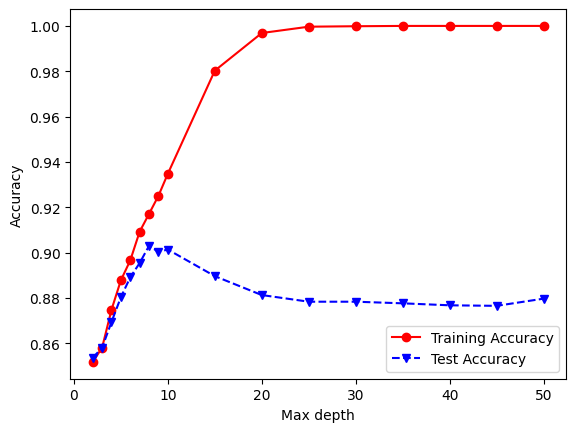

In [4]:
###########################################################################
# Model fit and performance evaluation for various tree depth from 2-50
###########################################################################

maxdepths = [2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,45,50]

trainAccuracy = np.zeros(len(maxdepths))
testAccuracy = np.zeros(len(maxdepths))

index = 0
for depth in maxdepths:
    clf = DecisionTreeClassifier(max_depth=depth)
    clf = clf.fit(X_train_70_30, Y_train_70_30)
    Y_predTrain = clf.predict(X_train_70_30)
    Y_predTest = clf.predict(X_test_70_30)
    trainAccuracy[index] = accuracy_score(Y_train_70_30, Y_predTrain)
    testAccuracy[index] = accuracy_score(Y_test_70_30, Y_predTest)
    print("Max Depth: ", depth)
    print("Training Accuracy: ", accuracy_score(Y_train_70_30, Y_predTrain))
    print("Testing Accuracy: ", accuracy_score(Y_test_70_30, Y_predTest))
    print("\n")
    index += 1

###########################################################################
# Plot training and test accuracies
##########################################################################
    
plt.plot(maxdepths,trainAccuracy,'ro-',maxdepths,testAccuracy,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Max depth')
plt.ylabel('Accuracy')

Max Depth:  2
Training Accuracy:  0.852202380952381
Testing Accuracy:  0.8527380952380952


Max Depth:  3
Training Accuracy:  0.8583035714285714
Testing Accuracy:  0.856904761904762


Max Depth:  4
Training Accuracy:  0.8745238095238095
Testing Accuracy:  0.8722619047619048


Max Depth:  5
Training Accuracy:  0.8836607142857142
Testing Accuracy:  0.8760714285714286


Max Depth:  6
Training Accuracy:  0.8963392857142857
Testing Accuracy:  0.8864285714285715


Max Depth:  7
Training Accuracy:  0.908720238095238
Testing Accuracy:  0.8928571428571429


Max Depth:  8
Training Accuracy:  0.91625
Testing Accuracy:  0.8982142857142857


Max Depth:  9
Training Accuracy:  0.9236309523809524
Testing Accuracy:  0.8979761904761905


Max Depth:  10
Training Accuracy:  0.9338392857142858
Testing Accuracy:  0.8992857142857142


Max Depth:  15
Training Accuracy:  0.9776488095238095
Testing Accuracy:  0.8813095238095238


Max Depth:  20
Training Accuracy:  0.9959523809523809
Testing Accuracy:  0.8754761

Text(0, 0.5, 'Accuracy')

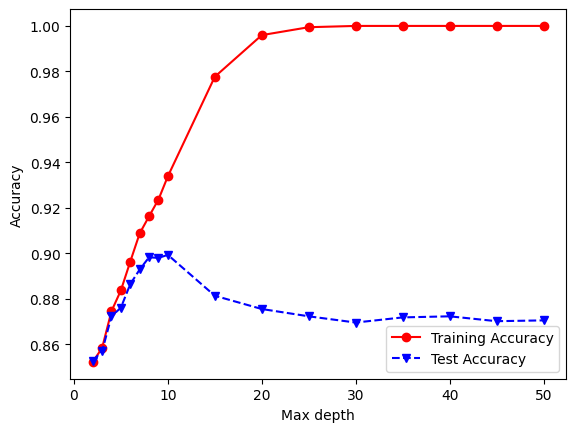

In [5]:
trainAccuracy = np.zeros(len(maxdepths))
testAccuracy = np.zeros(len(maxdepths))

index = 0
for depth in maxdepths:
    clf = DecisionTreeClassifier(max_depth=depth)
    clf = clf.fit(X_train_80_20, Y_train_80_20)
    Y_predTrain = clf.predict(X_train_80_20)
    Y_predTest = clf.predict(X_test_80_20)
    trainAccuracy[index] = accuracy_score(Y_train_80_20, Y_predTrain)
    testAccuracy[index] = accuracy_score(Y_test_80_20, Y_predTest)
    print("Max Depth: ", depth)
    print("Training Accuracy: ", accuracy_score(Y_train_80_20, Y_predTrain))
    print("Testing Accuracy: ", accuracy_score(Y_test_80_20, Y_predTest))
    print("\n")
    index += 1

###########################################################################
# Plot training and test accuracies
##########################################################################
    
plt.plot(maxdepths,trainAccuracy,'ro-',maxdepths,testAccuracy,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Max depth')
plt.ylabel('Accuracy')

#### Model Training and Assessment

From the 70:30 and 80:20 splits, we can observe an inflection point for the 'Test Accuracy' line at `maxdepths = 8` and `maxdepths = 10` respectively, with subsequent `maxdepths` values showing diminishing returns, indicating model overfitting.

We will this use the max-depths as the optimal parameter for our Decision Tree models for both 70:30 and 80:20 splits respectively
- `maxdepths` : `8`, `10`

We will then utilize a confusion matrix as well as classification report to perform an analysis of the model's accuracy based on several metrics (information obtained from [1][2]):
- `accuracy` : The proportion of all classifications that were correct, whether positive or negative
- `precision` : The proportion of all the model's positive classifications that are actually positive
- `recall` :  The proportion of all actual positives that were classified correctly as positives
- `f1-score` : The harmonic mean (a kind of average) of precision and recall, accounts for class-imbalances in dataset

For convenience sake we will utilize the `classification_report` function from the `sklearn.metrics`, which will not only break it down by these metrics by class but also provides us with the `Support` (i.e how many samples are in each class) alongside the `macro avg` (Averages for each class without considering class imbalance) and `weighted avg`(Averages for each class considers class imbalance)

In [6]:
MAX_DEPTH = 8

clf = DecisionTreeClassifier(max_depth=MAX_DEPTH)
clf = clf.fit(X_train_70_30, Y_train_70_30)
Y_predTrain = clf.predict(X_train_70_30)
Y_predTest = clf.predict(X_test_70_30)
print("Decision Tree trained with cir_ncir_pca_70_30:")
print("-------------------------------")
print("Max Depth: ", MAX_DEPTH)
print("Training Accuracy: ", accuracy_score(Y_train_70_30, Y_predTrain))
print("Testing Accuracy: ", accuracy_score(Y_test_70_30, Y_predTest))
print("\n")

training_accuracy.append(accuracy_score(Y_train_70_30, Y_predTrain))
testing_accuracy.append(accuracy_score(Y_test_70_30, Y_predTest))

Decision Tree trained with cir_ncir_pca_70_30:
-------------------------------
Max Depth:  8
Training Accuracy:  0.9171768707482993
Testing Accuracy:  0.9033333333333333




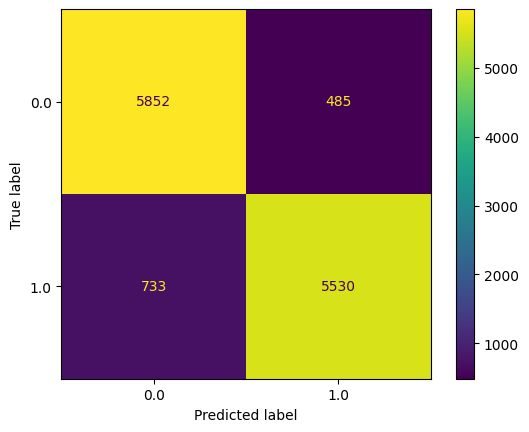

              precision    recall  f1-score   support

         0.0       0.89      0.92      0.91      6337
         1.0       0.92      0.88      0.90      6263

    accuracy                           0.90     12600
   macro avg       0.90      0.90      0.90     12600
weighted avg       0.90      0.90      0.90     12600



In [7]:
predictions = clf.predict(X_test_70_30)
cm = confusion_matrix(Y_test_70_30, predictions, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = clf.classes_)
disp.plot()
plt.show()

report = classification_report(Y_test_70_30, predictions)
print(report)

In [8]:
MAX_DEPTH = 10

clf = DecisionTreeClassifier(max_depth=MAX_DEPTH)
clf = clf.fit(X_train_80_20, Y_train_80_20)
Y_predTrain = clf.predict(X_train_80_20)
Y_predTest = clf.predict(X_test_80_20)
print("Decision Tree trained with cir_ncir_pca_80_20:")
print("-------------------------------")
print("Max Depth: ", MAX_DEPTH)
print("Training Accuracy: ", accuracy_score(Y_train_80_20, Y_predTrain))
print("Testing Accuracy: ", accuracy_score(Y_test_80_20, Y_predTest))
print("\n")

training_accuracy.append(accuracy_score(Y_train_80_20, Y_predTrain))
testing_accuracy.append(accuracy_score(Y_test_80_20, Y_predTest))

Decision Tree trained with cir_ncir_pca_80_20:
-------------------------------
Max Depth:  10
Training Accuracy:  0.9339285714285714
Testing Accuracy:  0.8989285714285714




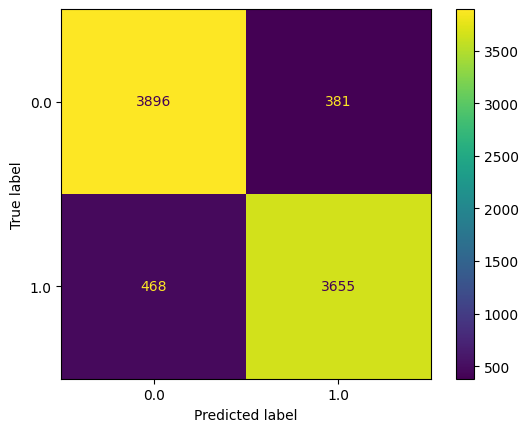

              precision    recall  f1-score   support

         0.0       0.89      0.91      0.90      4277
         1.0       0.91      0.89      0.90      4123

    accuracy                           0.90      8400
   macro avg       0.90      0.90      0.90      8400
weighted avg       0.90      0.90      0.90      8400



In [9]:
predictions = clf.predict(X_test_80_20)
cm = confusion_matrix(Y_test_80_20, predictions, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = clf.classes_)
disp.plot()
plt.show()

report = classification_report(Y_test_80_20, predictions)
print(report)

### <b> Dataset: cir_ncir_pca </b>

#### 70:30 vs 80:20 split

We will first look to split the dataset into 2 further subsets to look at the effects of 2 common 'training' : 'testing' data ratio splits: 
- 70 : 30 
- 80 : 20

In [10]:
# Select the features to be used for Classification
X = dataset_2.drop(columns = 'NLOS')
Y = dataset_2[['NLOS']].to_numpy()
Y = Y.reshape(-1)

# Create the Training and Test set with split 70:30 
X_train_70_30, X_test_70_30, Y_train_70_30, Y_test_70_30 = train_test_split(X, Y, test_size=0.3, random_state=RANDOM_STATE)

# Create the Training and Test set with split 80:20 
X_train_80_20, X_test_80_20, Y_train_80_20, Y_test_80_20 = train_test_split(X, Y, test_size=0.2, random_state=RANDOM_STATE)

#### Parameter tuning and Training vs Testing Accuracy

We will first look to train and plot the decision tree model based on several max depths (`maxdepths`) for both 70:30 and 80:20 dataset splits in order to obtain the paramteres that returns the most optimal results

Max Depth:  2
Training Accuracy:  0.8517687074829932
Testing Accuracy:  0.8535714285714285


Max Depth:  3
Training Accuracy:  0.8574149659863946
Testing Accuracy:  0.856904761904762


Max Depth:  4
Training Accuracy:  0.8720068027210884
Testing Accuracy:  0.8674603174603175


Max Depth:  5
Training Accuracy:  0.8873809523809524
Testing Accuracy:  0.8795238095238095


Max Depth:  6
Training Accuracy:  0.8945238095238095
Testing Accuracy:  0.8873015873015873


Max Depth:  7
Training Accuracy:  0.907891156462585
Testing Accuracy:  0.8948412698412699


Max Depth:  8
Training Accuracy:  0.9156462585034013
Testing Accuracy:  0.8980952380952381


Max Depth:  9
Training Accuracy:  0.92421768707483
Testing Accuracy:  0.8995238095238095


Max Depth:  10
Training Accuracy:  0.9341836734693878
Testing Accuracy:  0.8917460317460317


Max Depth:  15
Training Accuracy:  0.9811904761904762
Testing Accuracy:  0.8799206349206349


Max Depth:  20
Training Accuracy:  0.9958163265306123
Testing Accuracy: 

Text(0, 0.5, 'Accuracy')

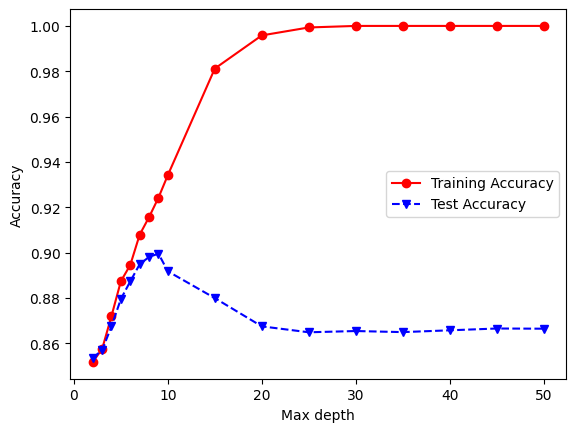

In [11]:
###########################################################################
# Model fit and performance evaluation for various tree depth from 2-50
###########################################################################

maxdepths = [2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,45,50]

trainAccuracy = np.zeros(len(maxdepths))
testAccuracy = np.zeros(len(maxdepths))

index = 0
for depth in maxdepths:
    clf = DecisionTreeClassifier(max_depth=depth)
    clf = clf.fit(X_train_70_30, Y_train_70_30)
    Y_predTrain = clf.predict(X_train_70_30)
    Y_predTest = clf.predict(X_test_70_30)
    trainAccuracy[index] = accuracy_score(Y_train_70_30, Y_predTrain)
    testAccuracy[index] = accuracy_score(Y_test_70_30, Y_predTest)
    print("Max Depth: ", depth)
    print("Training Accuracy: ", accuracy_score(Y_train_70_30, Y_predTrain))
    print("Testing Accuracy: ", accuracy_score(Y_test_70_30, Y_predTest))
    print("\n")
    index += 1

###########################################################################
# Plot training and test accuracies
##########################################################################
    
plt.plot(maxdepths,trainAccuracy,'ro-',maxdepths,testAccuracy,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Max depth')
plt.ylabel('Accuracy')

Max Depth:  2
Training Accuracy:  0.852202380952381
Testing Accuracy:  0.8527380952380952


Max Depth:  3
Training Accuracy:  0.8576488095238095
Testing Accuracy:  0.8557142857142858


Max Depth:  4
Training Accuracy:  0.8720238095238095
Testing Accuracy:  0.8697619047619047


Max Depth:  5
Training Accuracy:  0.8835119047619048
Testing Accuracy:  0.8745238095238095


Max Depth:  6
Training Accuracy:  0.8949702380952381
Testing Accuracy:  0.883452380952381


Max Depth:  7
Training Accuracy:  0.9076190476190477
Testing Accuracy:  0.8928571428571429


Max Depth:  8
Training Accuracy:  0.9152976190476191
Testing Accuracy:  0.895


Max Depth:  9
Training Accuracy:  0.9245833333333333
Testing Accuracy:  0.891547619047619


Max Depth:  10
Training Accuracy:  0.9356547619047619
Testing Accuracy:  0.8932142857142857


Max Depth:  15
Training Accuracy:  0.980922619047619
Testing Accuracy:  0.876547619047619


Max Depth:  20
Training Accuracy:  0.9958035714285715
Testing Accuracy:  0.87095238095

Text(0, 0.5, 'Accuracy')

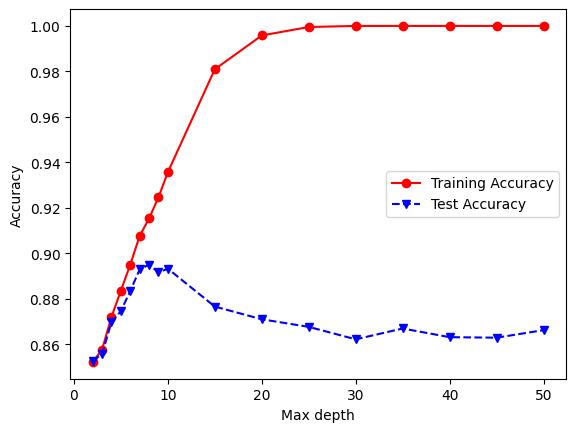

In [12]:
trainAccuracy = np.zeros(len(maxdepths))
testAccuracy = np.zeros(len(maxdepths))

index = 0
for depth in maxdepths:
    clf = DecisionTreeClassifier(max_depth=depth)
    clf = clf.fit(X_train_80_20, Y_train_80_20)
    Y_predTrain = clf.predict(X_train_80_20)
    Y_predTest = clf.predict(X_test_80_20)
    trainAccuracy[index] = accuracy_score(Y_train_80_20, Y_predTrain)
    testAccuracy[index] = accuracy_score(Y_test_80_20, Y_predTest)
    print("Max Depth: ", depth)
    print("Training Accuracy: ", accuracy_score(Y_train_80_20, Y_predTrain))
    print("Testing Accuracy: ", accuracy_score(Y_test_80_20, Y_predTest))
    print("\n")
    index += 1

###########################################################################
# Plot training and test accuracies
##########################################################################
    
plt.plot(maxdepths,trainAccuracy,'ro-',maxdepths,testAccuracy,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Max depth')
plt.ylabel('Accuracy')

#### Model Training and Assessment

From both 70:30 and 80:20 splits, we can observe an inflection point for the 'Test Accuracy' line at `maxdepths = 9` and `maxdepth = 8`, with subsequent `maxdepths` values showing diminishing returns, indicating model overfitting.

We will this use the max-depths as the optimal parameter for our Decision Tree models for both 70:30 and 80:20 splits respectively
- `max_depth` : `9`, `8`

We will then utilize a confusion matrix as well as classification report to perform an analysis of the model's accuracy based on several metrics (information obtained from [1][2]):
- `accuracy` : The proportion of all classifications that were correct, whether positive or negative
- `precision` : The proportion of all the model's positive classifications that are actually positive
- `recall` :  The proportion of all actual positives that were classified correctly as positives
- `f1-score` : The harmonic mean (a kind of average) of precision and recall, accounts for class-imbalances in dataset

For convenience sake we will utilize the `classification_report` function from the `sklearn.metrics`, which will not only break it down by these metrics by class but also provides us with the `Support` (i.e how many samples are in each class) alongside the `macro avg` (Averages for each class without considering class imbalance) and `weighted avg`(Averages for each class considers class imbalance)

In [13]:
MAX_DEPTH = 9

clf = DecisionTreeClassifier(max_depth=MAX_DEPTH)
clf = clf.fit(X_train_70_30, Y_train_70_30)
Y_predTrain = clf.predict(X_train_70_30)
Y_predTest = clf.predict(X_test_70_30)
print("Decision Tree trained with cir_ncir_pca_70_30:")
print("-------------------------------")
print("Max Depth: ", MAX_DEPTH)
print("Training Accuracy: ", accuracy_score(Y_train_70_30, Y_predTrain))
print("Testing Accuracy: ", accuracy_score(Y_test_70_30, Y_predTest))
print("\n")

training_accuracy.append(accuracy_score(Y_train_70_30, Y_predTrain))
testing_accuracy.append(accuracy_score(Y_test_70_30, Y_predTest))

Decision Tree trained with cir_ncir_pca_70_30:
-------------------------------
Max Depth:  9
Training Accuracy:  0.9240816326530612
Testing Accuracy:  0.8993650793650794




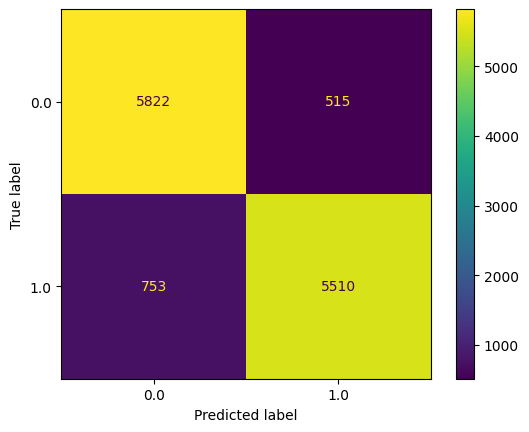

              precision    recall  f1-score   support

         0.0       0.89      0.92      0.90      6337
         1.0       0.91      0.88      0.90      6263

    accuracy                           0.90     12600
   macro avg       0.90      0.90      0.90     12600
weighted avg       0.90      0.90      0.90     12600



In [14]:
predictions = clf.predict(X_test_70_30)
cm = confusion_matrix(Y_test_70_30, predictions, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = clf.classes_)
disp.plot()
plt.show()

report = classification_report(Y_test_70_30, predictions)
print(report)

In [15]:
MAX_DEPTH = 8

clf = DecisionTreeClassifier(max_depth=MAX_DEPTH)
clf = clf.fit(X_train_80_20, Y_train_80_20)
Y_predTrain = clf.predict(X_train_80_20)
Y_predTest = clf.predict(X_test_80_20)
print("Decision Tree trained with cir_ncir_pca_80_20:")
print("-------------------------------")
print("Max Depth: ", MAX_DEPTH)
print("Training Accuracy: ", accuracy_score(Y_train_80_20, Y_predTrain))
print("Testing Accuracy: ", accuracy_score(Y_test_80_20, Y_predTest))
print("\n")

training_accuracy.append(accuracy_score(Y_train_80_20, Y_predTrain))
testing_accuracy.append(accuracy_score(Y_test_80_20, Y_predTest))

Decision Tree trained with cir_ncir_pca_80_20:
-------------------------------
Max Depth:  8
Training Accuracy:  0.9152976190476191
Testing Accuracy:  0.8951190476190476




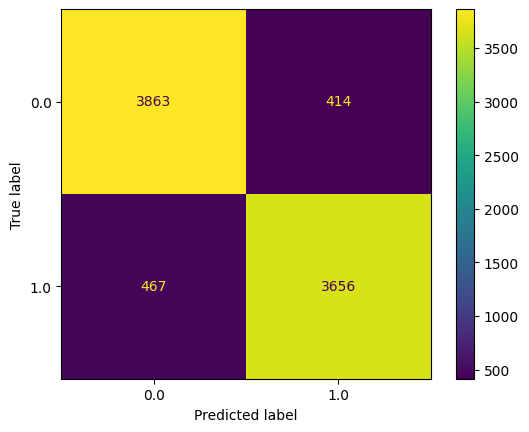

              precision    recall  f1-score   support

         0.0       0.89      0.90      0.90      4277
         1.0       0.90      0.89      0.89      4123

    accuracy                           0.90      8400
   macro avg       0.90      0.89      0.90      8400
weighted avg       0.90      0.90      0.90      8400



In [16]:
predictions = clf.predict(X_test_80_20)
cm = confusion_matrix(Y_test_80_20, predictions, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = clf.classes_)
disp.plot()
plt.show()

report = classification_report(Y_test_80_20, predictions)
print(report)

#### Conclusion

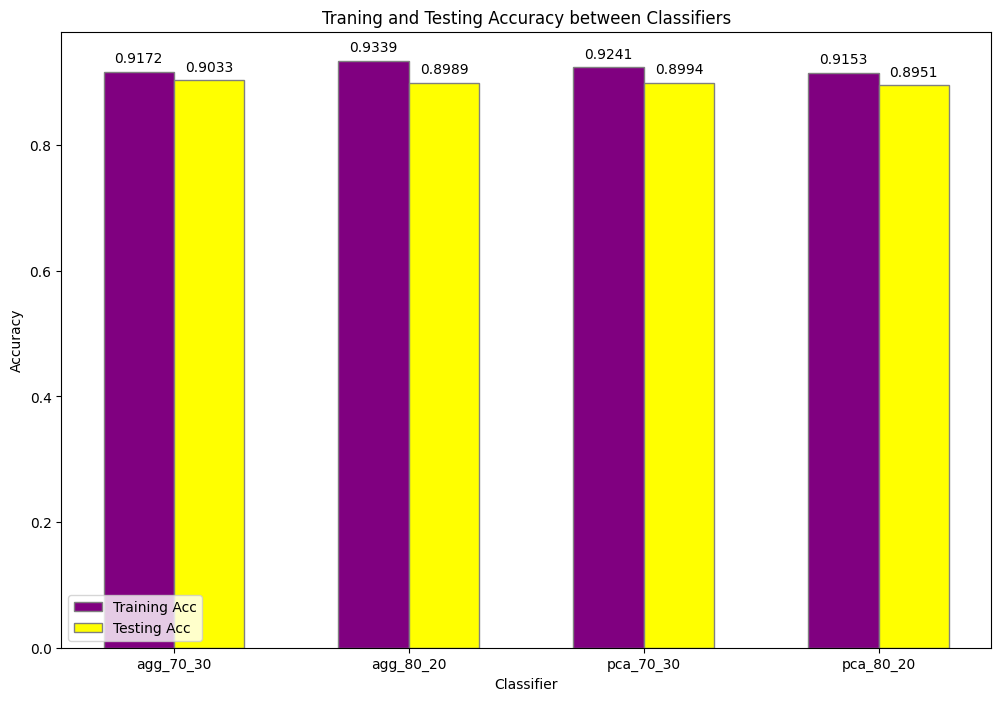

Highest Test Acc. Test set: agg_70_30
Highest Test Acc. value: 0.9033333333333333


In [17]:
barWidth = 0.30
fig = plt.subplots(figsize = (12, 8)) 

testing_label = ['agg_70_30', 'agg_80_20', 'pca_70_30', 'pca_80_20']

# Set position of bar on X axis 
br1 = np.arange(len(training_accuracy)) 
br2 = [x + barWidth for x in br1] 
 
# Make the plot
plt.bar(br1, training_accuracy, color ='purple', width = barWidth, 
        edgecolor ='grey', label ='Training Acc') 
plt.bar(br2, testing_accuracy, color ='yellow', width = barWidth, 
        edgecolor ='grey', label ='Testing Acc') 
 
# Adding Xticks 
plt.xlabel('Classifier') 
plt.ylabel('Accuracy') 
plt.xticks([r + 0.15 for r in range(len(training_accuracy))], 
        testing_label)
plt.title("Traning and Testing Accuracy between Classifiers")

# Add bar labels
for i in range(len(training_accuracy)):
    plt.text(br1[i], training_accuracy[i] + 0.01, 
             f'{training_accuracy[i]:.4f}', ha='center', va='bottom')
    plt.text(br2[i], testing_accuracy[i] + 0.01, 
             f'{testing_accuracy[i]:.4f}', ha='center', va='bottom')
plt.legend()
plt.show() 

print("Highest Test Acc. Test set:", testing_label[testing_accuracy.index(max(testing_accuracy))])
print("Highest Test Acc. value:", max(testing_accuracy))

We are going to select the model trained with the '70:30 training:testing split cir_ncir_agg' dataset with a 'max depth = 8' as it provides us with the (marginally) highest training and testing accuracy. This model will be saved to a pickle file for later usage.

In [18]:
# Select the features to be used for Classification
X = dataset_1.drop(columns = 'NLOS')
Y = dataset_1[['NLOS']].to_numpy()
Y = Y.reshape(-1)

# Create the Training and Test set with split 70:30 
X_train_70_30, X_test_70_30, Y_train_70_30, Y_test_70_30 = train_test_split(X, Y, test_size=0.3, random_state=RANDOM_STATE)

clf = DecisionTreeClassifier(max_depth=MAX_DEPTH)
clf = clf.fit(X_train_70_30, Y_train_70_30)
Y_predTrain = clf.predict(X_train_70_30)
Y_predTest = clf.predict(X_test_70_30)
print("Decision Tree trained with cir_ncir_agg_70_30:")
print("-------------------------------")
print("Max Depth: ", MAX_DEPTH)
print("Training Accuracy: ", accuracy_score(Y_train_70_30, Y_predTrain))
print("Testing Accuracy: ", accuracy_score(Y_test_70_30, Y_predTest))
print("\n")

save_to_pickle('dt_cir_ncir_agg_70_30', './pickled_models' , clf)

Decision Tree trained with cir_ncir_agg_70_30:
-------------------------------
Max Depth:  8
Training Accuracy:  0.9170748299319728
Testing Accuracy:  0.903015873015873




# <u> Appendum </u>

For the sake of analysis, we will also need to export the model trained with the `cir_ncir_agg_80_20` dataset

In [19]:
# Select the features to be used for Classification
X = dataset_1.drop(columns = 'NLOS')
Y = dataset_1[['NLOS']].to_numpy()
Y = Y.reshape(-1)

MAX_DEPTH = 8

# Create the Training and Test set with split 80:20 
X_train_80_20, X_test_80_20, Y_train_80_20, Y_test_80_20 = train_test_split(X, Y, test_size=0.2, random_state=RANDOM_STATE)

clf1 = DecisionTreeClassifier(max_depth=MAX_DEPTH)
clf1 = clf1.fit(X_train_80_20, Y_train_80_20)
Y_predTrain = clf1.predict(X_train_80_20)
Y_predTest = clf1.predict(X_test_80_20)
print("Max Depth: ", MAX_DEPTH)
print("Training Accuracy: ", accuracy_score(Y_train_80_20, Y_predTrain))
print("Testing Accuracy: ", accuracy_score(Y_test_80_20, Y_predTest))
print("\n")

save_to_pickle('dt_cir_ncir_agg_80_20', './pickled_models' , clf1)

Max Depth:  8
Training Accuracy:  0.91625
Testing Accuracy:  0.898452380952381




<hr>

# <u> References </u>

[1] Google. (n.d.). Classification: Accuracy, recall, precision, and related metrics. Google. https://developers.google.com/machine-learning/crash-course/classification/accuracy-precision-recall (accessed Mar. 16, 2025) <br>
[2] Hyperskill. (n.d.). https://hyperskill.org/learn/step/29339 (accessed Mar. 16, 2025) <br>
